In [1]:
import matplotlib.pyplot as plt
import shap
from model import get_model

In [2]:
%%capture
cate_model, df, feature_columns = get_model()

In [3]:
# Note: Could also use
# explainer = shap.Explainer(cate_model)
explainer = shap.TreeExplainer(cate_model)
shap_values = explainer(df[feature_columns])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


## Explain individual predictions

In [4]:
def explain(index, kind):
    data_row = df.loc[index, feature_columns].to_numpy()
    shap_value = shap_values[index, :].values
    
    shap.initjs()
    if kind == "force":
        return shap.force_plot(explainer.expected_value, shap_value, data_row, feature_names=feature_columns)
    return shap.plots.waterfall(shap_values[index])

In [5]:
explain(1, "force")

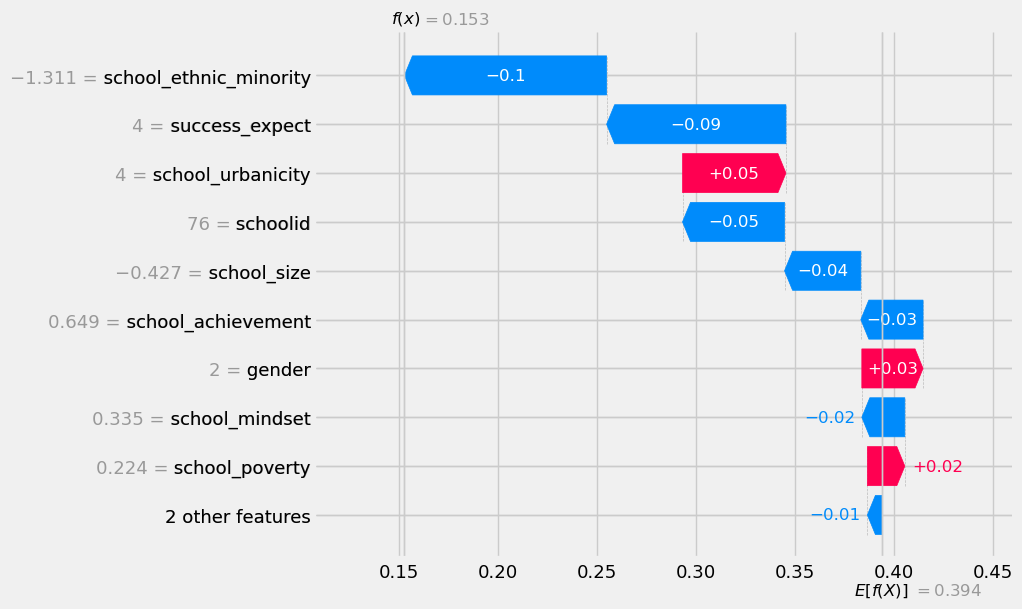

In [6]:
explain(1, "waterfall")

In [7]:
explain(10, "force")

In [8]:
explain(100, "force")

In [9]:
explain(1000, "force")

## Explain set of predictions

In [10]:
data_row = df.loc[1:20, feature_columns].to_numpy()
shap_value = shap_values[1:21, :].values
shap.initjs()
shap.force_plot(explainer.expected_value, shap_value, data_row, feature_names=feature_columns)

## Summary plots

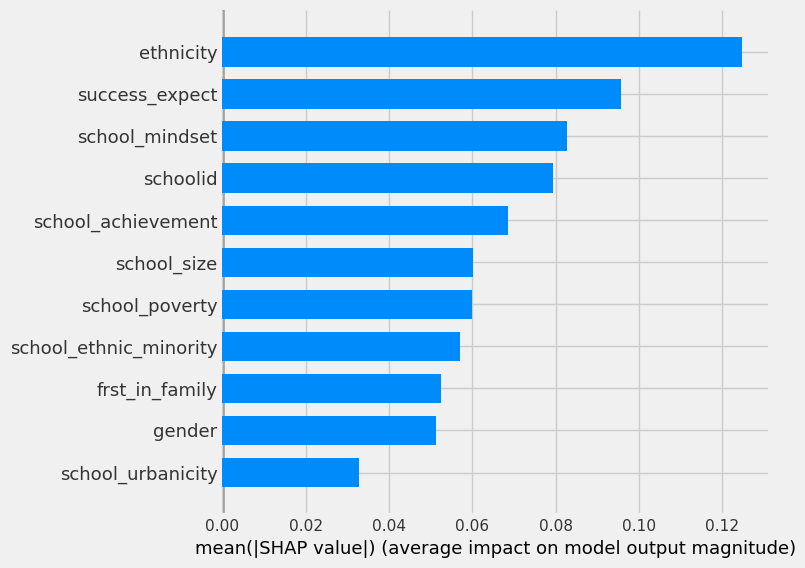

In [11]:
shap.summary_plot(shap_values, df[feature_columns], plot_type="bar")

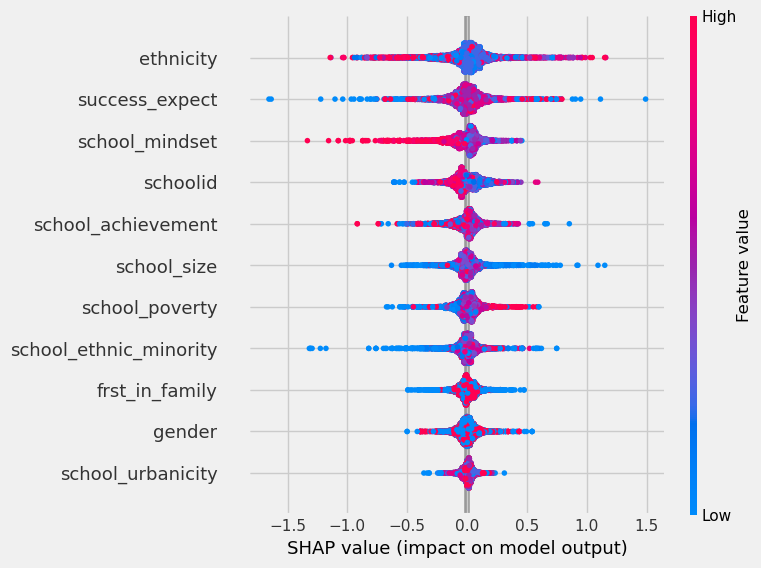

In [12]:
shap.summary_plot(shap_values, df[feature_columns])